# Regresión Logística

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import (accuracy_score,precision_score,recall_score)

In [2]:
data=pd.read_csv("../Data/ex2data2.txt",header=None)
data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


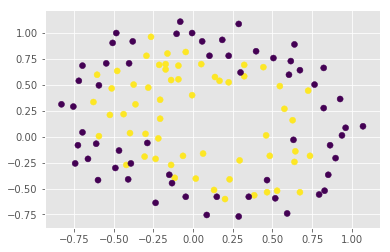

In [3]:
X=data.iloc[:,0:2]
Y=data.iloc[:,2]
plt.scatter(X[0],X[1],c=Y)
plt.show()

C:\Users\USUARIO\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\USUARIO\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

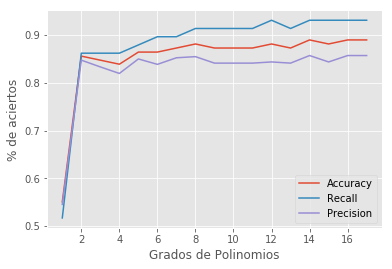

In [4]:
# Buscar el grado del polinomio óptimo 
modelo=linear_model.LogisticRegression(C=1e20)
grados=np.arange(1,18)
Accu=np.zeros(grados.shape)
Prec=np.zeros(grados.shape)
Reca=np.zeros(grados.shape)
Nvar=np.zeros(grados.shape)

for ngrado in grados:
    poly=PolynomialFeatures(ngrado)
    Xa=poly.fit_transform(X)
    modelo.fit(Xa,Y)
    
    Yhat=modelo.predict(Xa)
    
    Accu[ngrado-1]=accuracy_score(Y,Yhat)
    Reca[ngrado-1]=recall_score(Y,Yhat)
    Prec[ngrado-1]=precision_score(Y,Yhat)
    Nvar[ngrado-1]=len(modelo.coef_[0])
    
plt.plot(grados,Accu)
plt.plot(grados,Reca)
plt.plot(grados,Prec)
plt.xlabel("Grados de Polinomios")
plt.ylabel("% de aciertos")
plt.legend(("Accuracy","Recall","Precision"),loc="best")
plt.show()

C:\Users\USUARIO\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


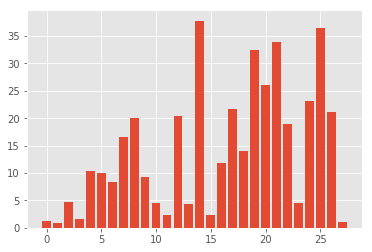

In [5]:
# Seleccionar el modelo deseado con 90% de ajuste
ngrado=6
poly=PolynomialFeatures(ngrado)
Xa=poly.fit_transform(X)
modelo.fit(Xa,Y)
Yhat=modelo.predict(Xa)
W=modelo.coef_[0]

plt.bar(np.arange(len(W)),np.abs(W))
plt.show()

In [6]:
# Seleccionar coeficientes > umbral
umbral=5
ind=np.abs(W)>umbral
Xa_simp=Xa[:,ind]
modelo1=linear_model.LogisticRegression(C=1e20)
modelo1.fit(Xa_simp,Y)
Yhat1=modelo1.predict(Xa_simp)

# Modelo original con ngrado=6
print("Accuracy Modelo Original",accuracy_score(Y,Yhat))

# Modelo original con ngrado=6 pero ya simplificado
print("Accuracy Modelo Simplificado",accuracy_score(Y,Yhat1))

Accuracy Modelo Original 0.864406779661017
Accuracy Modelo Simplificado 0.8728813559322034


C:\Users\USUARIO\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
